# preparação do ambiente

In [1]:
system("apt-get install -y libfftw3-dev libtiff5-dev libpng-dev")

# --- 1. Instalação e Carregamento do Pacote ---
install.packages("BiocManager")
BiocManager::install("EBImage")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.22 (BiocManager 1.30.27), R 4.5.2 (2025-10-31)

Installing package(s) 'BiocVersion', 'EBImage'

also installing the dependencies ‘bitops’, ‘BiocGenerics’, ‘abind’, ‘tiff’, ‘jpeg’, ‘png’, ‘locfit’, ‘fftwtools’, ‘RCurl’


Old packages: 'selectr', 'testthat'



# transformação logarítmica

Exibindo imagem original de baixo contraste...
Exibindo e comparando o resultado...


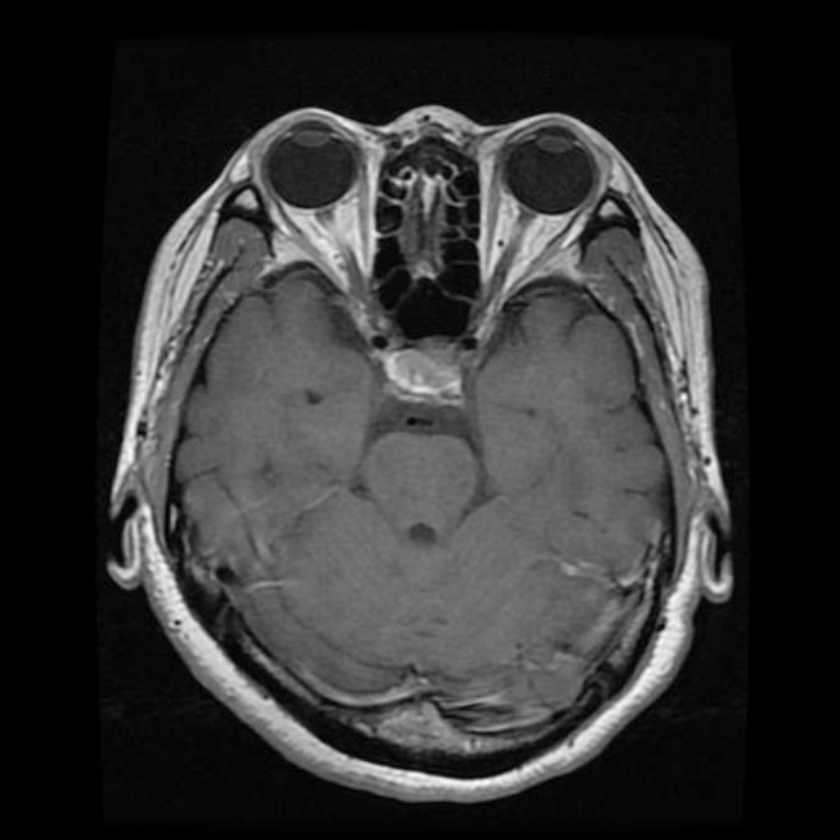

In [2]:
library(EBImage)

# --- 2. Carregamento da Imagem (Substituindo a Simulação) ---
caminho_da_imagem <- "/content/P_1.jpg"
img_baixo_contraste <- readImage(caminho_da_imagem)
cat("Exibindo imagem original de baixo contraste...\n")

# --- 3. Aplicação da Transformação Logarítmica ---
img_log_transformada <- log(1 + img_baixo_contraste)
img_log_final <- normalize(img_log_transformada)

# --- 4. Exibição e Comparação dos Resultados ---
cat("Exibindo e comparando o resultado...\n")
# display(img_baixo_contraste, title = "Original")
display(img_log_final, title = "Logarítmica")

# transformação de potência (gamma)

Exibindo imagem original de baixo contraste...
Exibindo e comparando o resultado com Gamma = 0.5...


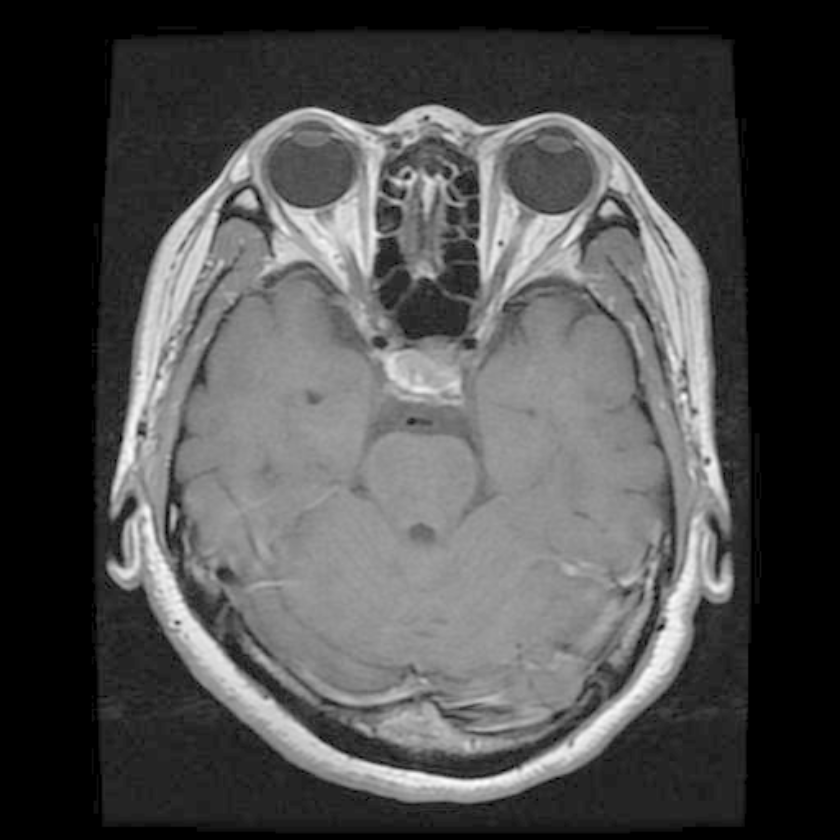

In [3]:
# --- 1. Instalação e Carregamento do Pacote ---
# Certifique-se de que o EBImage está instalado (veja as instruções anteriores)
library(EBImage)

# --- 2. Parâmetro Gamma ---
# Definimos o valor de Gamma (γ).
# Para REALÇAR SOMBRAS (clarear áreas escuras), use Gamma < 1.
GAMMA_VALUE <- 0.5

# Para ESCURECER AS SOMBRAS (realçar realces), use Gamma > 1.
# GAMMA_VALUE <- 2.5

# --- 3. Carregamento da Imagem ---
caminho_da_imagem <- "/content/P_1.jpg"
img_baixo_contraste <- readImage(caminho_da_imagem)
cat("Exibindo imagem original de baixo contraste...\n")


# --- 4. Aplicação da Transformação de Potência (Gamma) ---
# A Transformação de Potência é dada por Y = X^γ.
# A função '^' no R realiza a potência.
# Se GAMMA_VALUE < 1, esta curva expande os tons escuros (realça as sombras).
img_gamma_transformada <- img_baixo_contraste ^ GAMMA_VALUE

# Nota: Diferentemente da logarítmica, a transformação de potência
# (em pixels normalizados 0-1) geralmente mantém os valores dentro da faixa [0, 1].
# No entanto, a normalização (normalize) é uma boa prática para garantir o uso total da faixa dinâmica.
img_gamma_final <- normalize(img_gamma_transformada)


# --- 5. Exibição e Comparação dos Resultados ---
cat(paste0("Exibindo e comparando o resultado com Gamma = ", GAMMA_VALUE, "...\n"))
# display(img_baixo_contraste, title = "Original")
display(img_gamma_final, title = paste0("Potência (Gamma = ", GAMMA_VALUE, ")"))

# Para exibição lado a lado (opcional)
# img_comparacao <- combine(img_baixo_contraste, img_gamma_final)
# display(img_comparacao, title = "Original vs. Transformação Gamma")

# equalização de histograma

Iniciando Equalização de Histograma...
Exibindo e comparando o resultado...


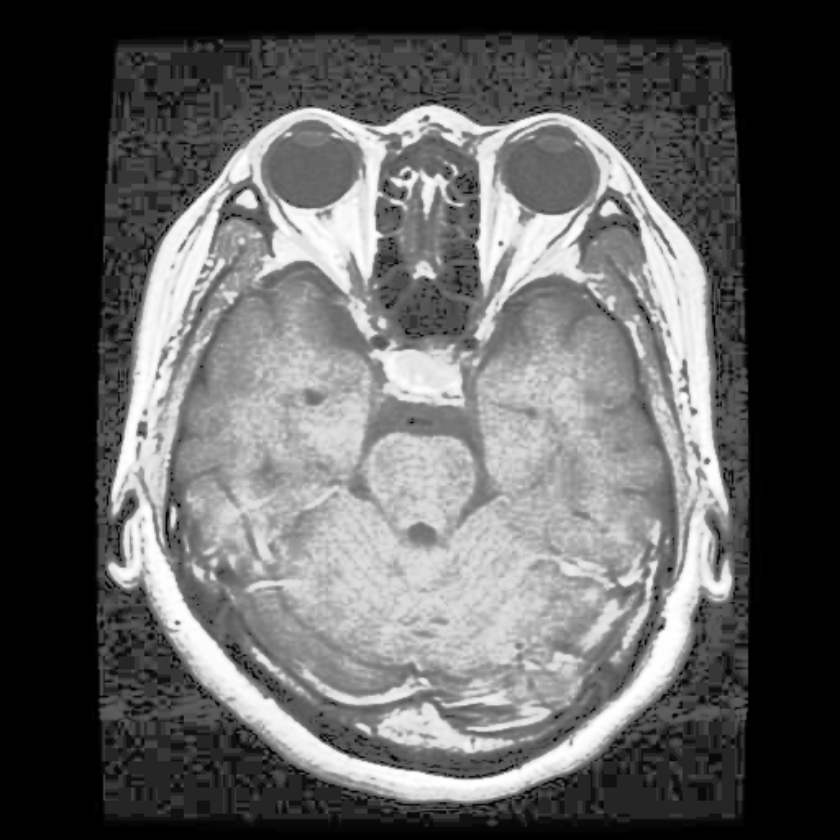

In [4]:
# --- 1. Instalação e Carregamento do Pacote ---
# Se necessário, descomente e execute as linhas de instalação:
# install.packages("BiocManager")
# BiocManager::install("EBImage")
library(EBImage)

# --- 2. Carregamento da Imagem ---
# Substitua o caminho pela sua imagem de baixo contraste
caminho_da_imagem <- "/content/P_1.jpg"
img_baixo_contraste <- readImage(caminho_da_imagem)

cat("Iniciando Equalização de Histograma...\n")

# --- 3. Aplicação da Equalização de Histograma (HE Global) ---
# A função 'equalize()' aplica o algoritmo de HE Global.
# Ela utiliza a Função de Distribuição Cumulativa (CDF) para mapear os pixels,
# expandindo as faixas de tons mais densas.
img_equalizada <- equalize(img_baixo_contraste)

# --- 4. Exibição e Comparação dos Resultados ---
cat("Exibindo e comparando o resultado...\n")

# Exibe a imagem original e a imagem após a HE Global
# display(img_baixo_contraste, title = "Original (Baixo Contraste)")
display(img_equalizada, title = "Equalização de Histograma (HE Global)")

# Se preferir a comparação lado a lado:
# img_comparacao <- combine(img_baixo_contraste, img_equalizada)
# display(img_comparacao, title = "Original vs. HE Global")

# equalização de histograma adaptativa

Iniciando pré-processamento para CLAHE...
Dimensões Originais: 512x512
Dimensões Redimensionadas: 512x512
Iniciando Equalização Adaptativa (CLAHE)...
Exibindo as imagens...


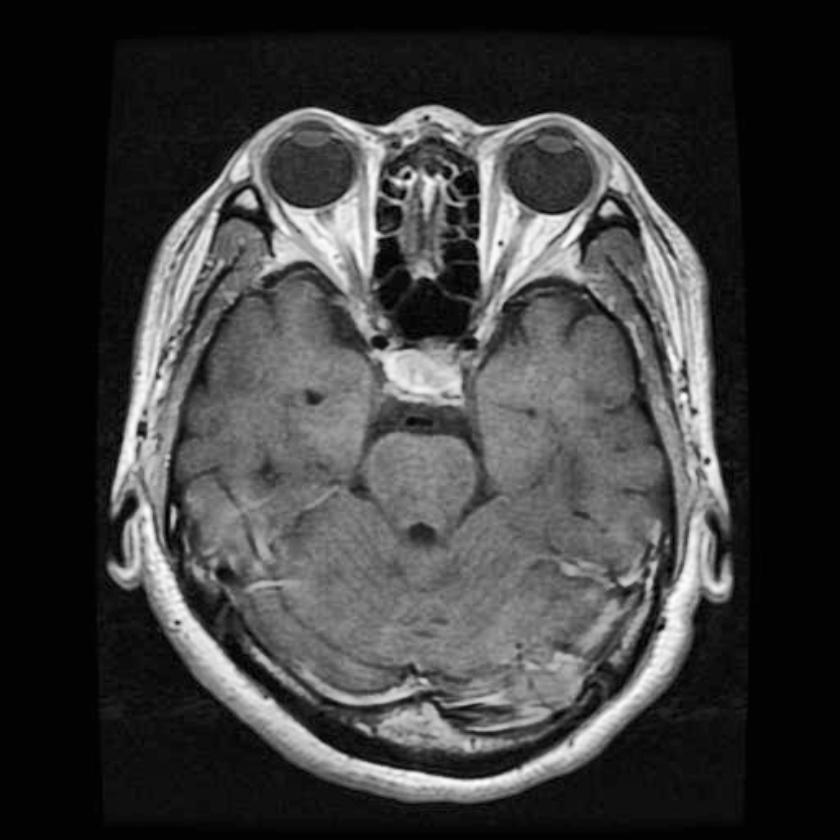

In [5]:
# --- 1. Instalação e Carregamento do Pacote ---
library(EBImage)

# --- 2. Definição dos Parâmetros CLAHE ---
NUM_BLOCKS_X <- 8
NUM_BLOCKS_Y <- 8
CLIP_LIMIT <- 2.5

# --- 3. Carregamento da Imagem ---
caminho_da_imagem <- "/content/P_1.jpg"
img_original <- readImage(caminho_da_imagem)

cat("Iniciando pré-processamento para CLAHE...\n")

# --- NOVO PASSO: Pré-processamento e Redimensionamento (Solução do Erro) ---
dimensoes_originais <- dim(img_original)
largura_original <- dimensoes_originais[1]
altura_original <- dimensoes_originais[2]

# 3.1. Calcular as novas dimensões
# Isso garante que a nova largura/altura seja um múltiplo exato de NUM_BLOCKS_X/Y
nova_largura <- largura_original - (largura_original %% NUM_BLOCKS_X)
nova_altura <- altura_original - (altura_original %% NUM_BLOCKS_Y)

if (nova_largura <= 0 || nova_altura <= 0) {
  stop("Erro no cálculo do redimensionamento. A imagem é muito pequena.")
}

# 3.2. Redimensionar a imagem
img_baixo_contraste_resized <- resize(img_original, w = nova_largura, h = nova_altura)

cat(paste0("Dimensões Originais: ", largura_original, "x", altura_original, "\n"))
cat(paste0("Dimensões Redimensionadas: ", nova_largura, "x", nova_altura, "\n"))
cat("Iniciando Equalização Adaptativa (CLAHE)...\n")


# --- 4. Aplicação do CLAHE ---
# Aplicamos o CLAHE na imagem redimensionada
img_clahe_final <- clahe(img_baixo_contraste_resized,
                         nx = NUM_BLOCKS_X,
                         ny = NUM_BLOCKS_Y,
                         limit = CLIP_LIMIT)


# --- 5. Exibição das Imagens ---
cat("Exibindo as imagens...\n")

# Para exibir lado a lado, pode-se usar combine() e um loop, mas
# para manter a estrutura original, exibo em janelas separadas:

# Exibe a imagem Original
# display(img_original, title = "1. Imagem Original")

# Exibe a imagem processada pelo CLAHE (já redimensionada)
display(img_clahe_final,
        title = paste0("2. CLAHE (Blocos: ", NUM_BLOCKS_X, "x", NUM_BLOCKS_Y, ", Limite: ", CLIP_LIMIT, ")"))